In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import requests
from census import Census
from us import states

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# Importing csv files for wildfires and for census years.
wildfires = pd.read_csv("NOAA_csvs/wildfires_2010_2019.csv")
combo = pd.read_csv("NOAA_csvs/combined_zone_county_data.csv")
census_data_2010 = pd.read_csv(f"Census_csvs/2010_census_data_ca_county.csv")
census_data_2011 = pd.read_csv(f"Census_csvs/2011_census_data_ca_county.csv")
census_data_2012 = pd.read_csv(f"Census_csvs/2012_census_data_ca_county.csv")
census_data_2013 = pd.read_csv(f"Census_csvs/2013_census_data_ca_county.csv")
census_data_2014 = pd.read_csv(f"Census_csvs/2014_census_data_ca_county.csv")
census_data_2015 = pd.read_csv(f"Census_csvs/2015_census_data_ca_county.csv")
census_data_2016 = pd.read_csv(f"Census_csvs/2016_census_data_ca_county.csv")
census_data_2017 = pd.read_csv(f"Census_csvs/2017_census_data_ca_county.csv")
census_data_2018 = pd.read_csv(f"Census_csvs/2018_census_data_ca_county.csv")
census_data_2019 = pd.read_csv(f"Census_csvs/2019_census_data_ca_county.csv")

In [3]:
# Function to just remove the word County.
def remove_county(name):
    name = name.replace(" County","")
    return name
# Function to drop extra columns.
def drop_extra(file):
    file.drop(columns=['Poverty Count','Poverty Rate','County'],inplace=True)
    return file

In [4]:
# Removing the word County from census files.
census_files = [census_data_2010,census_data_2011,census_data_2012,census_data_2013,census_data_2014,
                census_data_2015,census_data_2016,census_data_2017,census_data_2018,census_data_2019]

for file in census_files:
    new_name=""
    new_names=[]
    for name in file["Name"]:
        new_name = remove_county(name)
        new_names.append(new_name)
    file["Name"] = new_names
    file = drop_extra(file)

In [5]:
# Drop undated fires.
combo.dropna(subset=['Begin_Date','County'],inplace=True)
# Group by NOAA FIP
combo.groupby("NOAA_FIP")
combo_counts = pd.DataFrame(combo["County"].value_counts())
combo_counts = combo_counts.reset_index()
combo_counts.rename(columns={"index":"County","County":"Fires"},inplace=True)
combo_counts = combo_counts.sort_values("Fires",ascending=False)
combo_counts.set_index("County")
combo_counts.reset_index(inplace=True)
combo_counts.drop(columns=["index"],inplace=True)
# List of counties with highest fire totals.
top_fires = combo_counts[combo_counts["Fires"]>=17]
top_fires = top_fires["County"].tolist()
top_fires = combo[combo["County"].isin(top_fires)]
all_fires = combo_counts[combo_counts["Fires"]>=17]
all_fires = all_fires["County"].tolist()
all_fires = combo[combo["County"].isin(all_fires)]
# Adds year column and drops Begin_Date column.
year = [date[-4:] for date in top_fires["Begin_Date"]]
top_fires["Year"] = year
top_fires.drop(columns=['Begin_Date','Zone'],inplace=True)
year = [date[-4:] for date in all_fires["Begin_Date"]]
all_fires["Year"] = year
all_fires.drop(columns=['Begin_Date','Zone','NOAA_Zone','FIP','Latitude','Longitude','NOAA_FIP'],inplace=True)
all_fires.sort_values("Year",inplace=True)
# Creates DataFrames for each top county.
nevada = top_fires[top_fires["County"] == 'Nevada']
yuba = top_fires[top_fires["County"] == 'Yuba']
amador = top_fires[top_fires["County"] == 'Amador']
el_dorado = top_fires[top_fires["County"] == 'El Dorado']
placer = top_fires[top_fires["County"] == 'Placer']
ventura = top_fires[top_fires["County"] == 'Ventura']
los_angeles = top_fires[top_fires["County"] == 'Los Angeles']
san_diego = top_fires[top_fires["County"] == 'San Diego']
riverside = top_fires[top_fires["County"] == 'Riverside']
san_bernardino = top_fires[top_fires["County"] == 'San Bernardino']
siskiyou = top_fires[top_fires["County"] == 'Siskiyou']
modoc = top_fires[top_fires["County"] == 'Modoc']

C:\Users\mrjac\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mrjac\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\mrjac\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [52]:
# Yearly fire data by county.
y10 = pd.DataFrame()
y10 = all_fires[all_fires["Year"] =='2010']
y11 = pd.DataFrame()
y11 = all_fires[all_fires["Year"] =='2011']
y12 = pd.DataFrame()
y12 = all_fires[all_fires["Year"] =='2012']
y13 = pd.DataFrame()
y13 = all_fires[all_fires["Year"] =='2013']
y14 = pd.DataFrame()
y14 = all_fires[all_fires["Year"] =='2014']
y15 = pd.DataFrame()
y15 = all_fires[all_fires["Year"] =='2015']
y16 = pd.DataFrame()
y16 = all_fires[all_fires["Year"] =='2016']
y17 = pd.DataFrame()
y17 = all_fires[all_fires["Year"] =='2017']
y18 = pd.DataFrame()
y18 = all_fires[all_fires["Year"] =='2018']
y19 = pd.DataFrame()
y19 = all_fires[all_fires["Year"] =='2019']
y10 = pd.DataFrame(data = {'County':['San Bernardino','Siskiyou','Riverside','San Diego'],'2010 Fires':[7,1,8,2]})
y11 = pd.DataFrame(data = {'County':['San Bernardino','Siskiyou','Riverside','San Diego','Modoc'],'2011 Fires':[4,3,2,2,1]})
y12 = pd.DataFrame(data = {'County':['San Bernardino','Siskiyou','Riverside','San Diego','Modoc'],'2012 Fires':[7,2,6,5,2]})
y13 = pd.DataFrame(data = {'County':['Placer','Siskiyou','San Diego','San Bernardino','Los Angeles','Ventura','Riverside','El Dorado','Nevada','Amador','Yuba'],'2013 Fires':[3,3,3,7,4,3,6,3,3,3,3]})
y14 = pd.DataFrame(data = {'County':['Siskiyou','San Diego','Riverside','Modoc','Los Angeles','Amador','San Bernardino','El Dorado','Yuba','Nevada','Placer'],'2014 Fires':[12,10,4,4,2,2,2,2,2,2,2]})
y15 = pd.DataFrame(data = {'County':['El Dorado','Amador','Placer','Yuba','Nevada','San Bernardino','Modoc','San Diego'],'2015 Fires':[5,5,5,4,4,3,2,1]})
y16 = pd.DataFrame(data = {'County':['Los Angeles','Siskiyou','San Bernardino','El Dorado','Amador','Modoc','San Diego','Yuba','Nevada','Placer','Riverside','Ventura'],'2016 Fires':[5,4,3,2,2,2,2,2,2,2,1,1]})
y17 = pd.DataFrame(data = {'County':['Siskiyou','Nevada','Modoc','Yuba','San Bernardino','Ventura','San Diego','Riverside','El Dorado','Placer','Los Angeles','Amador'],'2017 Fires':[6,5,4,4,3,3,2,2,2,2,1,1]})
y18 = pd.DataFrame(data = {'County':['Riverside','Siskiyou','Los Angeles','Ventura','Yuba','San Diego','Nevada','Modoc','Amador','El Dorado','San Bernardino','Placer'],'2018 Fires':[6,5,4,4,2,2,2,1,1,1,1,1]})
y19 = pd.DataFrame(data = {'County':['San Bernardino','Riverside','Ventura','Los Angeles','Siskiyou','Amador','Modoc','El Dorado','Placer','Yuba','San Diego','Nevada'],'2019 Fires':[10,10,8,6,4,3,3,2,2,1,1,1]})

In [66]:
# Complete yearly population and fire data.
yearly_pop = pd.DataFrame()
yearly_pop["County"] = census_data_2010["Name"].astype(object)
yearly_pop = pd.merge(yearly_pop,y10,how="outer",on="County")
yearly_pop["2010 Pop."] = census_data_2010["Population"].astype(int)
yearly_pop = pd.merge(yearly_pop,y11,how="outer",on="County")
yearly_pop["2011 Pop."] = census_data_2011["Population"].astype(int)
yearly_pop = pd.merge(yearly_pop,y12,how="outer",on="County")
yearly_pop["2012 Pop."] = census_data_2012["Population"].astype(int)
yearly_pop = pd.merge(yearly_pop,y13,how="outer",on="County")
yearly_pop["2013 Pop."] = census_data_2013["Population"].astype(int)
yearly_pop = pd.merge(yearly_pop,y14,how="outer",on="County")
yearly_pop["2014 Pop."] = census_data_2014["Population"].astype(int)
yearly_pop = pd.merge(yearly_pop,y15,how="outer",on="County")
yearly_pop["2015 Pop."] = census_data_2015["Population"].astype(int)
yearly_pop = pd.merge(yearly_pop,y16,how="outer",on="County")
yearly_pop["2016 Pop."] = census_data_2016["Population"].astype(int)
yearly_pop = pd.merge(yearly_pop,y17,how="outer",on="County")
yearly_pop["2017 Pop."] = census_data_2017["Population"].astype(int)
yearly_pop = pd.merge(yearly_pop,y18,how="outer",on="County")
yearly_pop["2018 Pop."] = census_data_2018["Population"].astype(int)
yearly_pop = pd.merge(yearly_pop,y19,how="outer",on="County")
yearly_pop["2019 Pop."] = census_data_2019["Population"].astype(int)
yearly_pop = yearly_pop.fillna(0.0)
yearly_pop[['2010 Fires','2011 Fires','2012 Fires','2013 Fires','2014 Fires','2015 Fires','2016 Fires','2017 Fires','2018 Fires','2019 Fires']] = yearly_pop[['2010 Fires','2011 Fires','2012 Fires','2013 Fires','2014 Fires','2015 Fires','2016 Fires','2017 Fires','2018 Fires','2019 Fires']].astype(int)
yearly_pop.to_csv("NOAA_csvs/yearly_pop_fire_data.csv",index=False)

In [8]:
# Nevada
nevada = pd.DataFrame(nevada["Year"].value_counts())
nevada.reset_index(inplace=True)
nevada.rename(columns={"index":"Year","Year":"Fires"},inplace=True)
nevada = nevada.sort_values("Year")
# Yuba
yuba = pd.DataFrame(yuba["Year"].value_counts())
yuba.reset_index(inplace=True)
yuba.rename(columns={"index":"Year","Year":"Fires"},inplace=True)
yuba = yuba.sort_values("Year")
# Amador
amador = pd.DataFrame(amador["Year"].value_counts())
amador.reset_index(inplace=True)
amador.rename(columns={"index":"Year","Year":"Fires"},inplace=True)
amador = amador.sort_values("Year")
# El Dorado
el_dorado = pd.DataFrame(el_dorado["Year"].value_counts())
el_dorado.reset_index(inplace=True)
el_dorado.rename(columns={"index":"Year","Year":"Fires"},inplace=True)
el_dorado = el_dorado.sort_values("Year")
# Placer
placer = pd.DataFrame(placer["Year"].value_counts())
placer.reset_index(inplace=True)
placer.rename(columns={"index":"Year","Year":"Fires"},inplace=True)
placer = placer.sort_values("Year")
# Ventura
ventura = pd.DataFrame(ventura["Year"].value_counts())
ventura.reset_index(inplace=True)
ventura.rename(columns={"index":"Year","Year":"Fires"},inplace=True)
ventura = ventura.sort_values("Year")
# Los Angeles
los_angeles = pd.DataFrame(los_angeles["Year"].value_counts())
los_angeles.reset_index(inplace=True)
los_angeles.rename(columns={"index":"Year","Year":"Fires"},inplace=True)
los_angeles = los_angeles.sort_values("Year")
# San Diego
san_diego = pd.DataFrame(san_diego["Year"].value_counts())
san_diego.reset_index(inplace=True)
san_diego.rename(columns={"index":"Year","Year":"Fires"},inplace=True)
san_diego = san_diego.sort_values("Year")
# Riverside
riverside = pd.DataFrame(riverside["Year"].value_counts())
riverside.reset_index(inplace=True)
riverside.rename(columns={"index":"Year","Year":"Fires"},inplace=True)
riverside = riverside.sort_values("Year")
# San Bernadino
san_bernardino = pd.DataFrame(san_bernardino["Year"].value_counts())
san_bernardino.reset_index(inplace=True)
san_bernardino.rename(columns={"index":"Year","Year":"Fires"},inplace=True)
san_bernardino = san_bernardino.sort_values("Year")
# Siskiyou
siskiyou = pd.DataFrame(siskiyou["Year"].value_counts())
siskiyou.reset_index(inplace=True)
siskiyou.rename(columns={"index":"Year","Year":"Fires"},inplace=True)
siskiyou = siskiyou.sort_values("Year")
# Modoc
modoc = pd.DataFrame(modoc["Year"].value_counts())
modoc.reset_index(inplace=True)
modoc.rename(columns={"index":"Year","Year":"Fires"},inplace=True)
modoc = modoc.sort_values("Year")

In [9]:
# Twelve
twelve = pd.DataFrame(top_fires["Year"].value_counts())
twelve.reset_index(inplace=True)
twelve.rename(columns={"index":"Year","Year":"Fires"},inplace=True)
twelve = twelve.sort_values("Year")
twelve["Average Fires"] = (twelve["Fires"]/12)

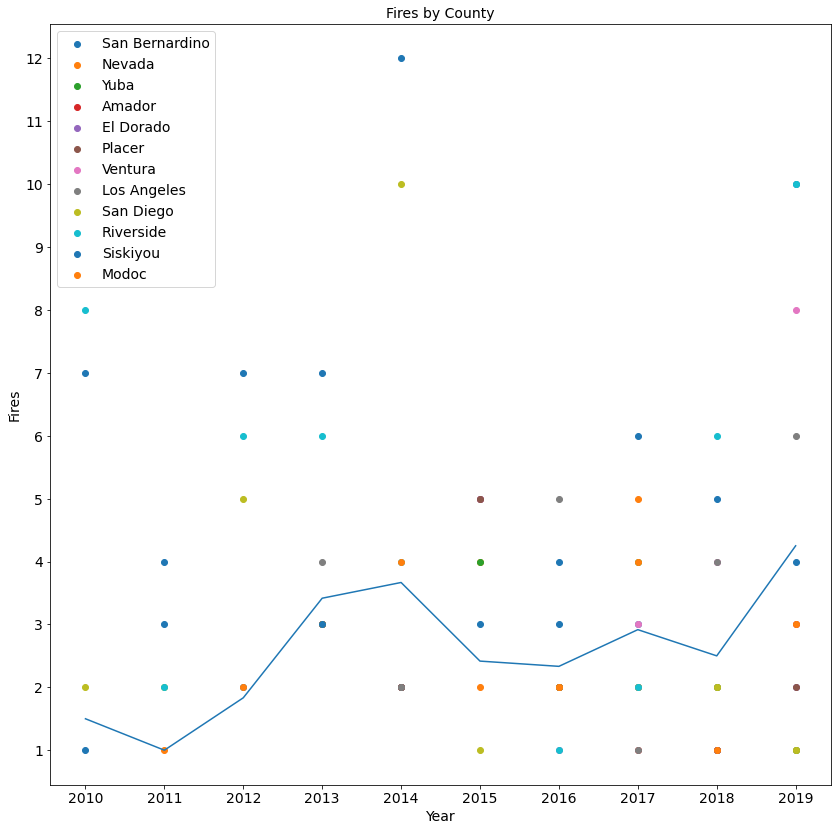

In [64]:
#OUTPUT SAVED - ADDING NEW CELLS ABOVE 
fig = plt.subplots(figsize=(14,14))
san_bernardino_plot = plt.scatter(san_bernardino["Year"],san_bernardino["Fires"],marker='o')
nevada_plot = plt.scatter(nevada["Year"],nevada["Fires"],marker='o')
yuba_plot = plt.scatter(yuba["Year"],yuba["Fires"],marker='o')
amador_plot = plt.scatter(amador["Year"],amador["Fires"],marker='o')
el_dorado_plot = plt.scatter(el_dorado["Year"],el_dorado["Fires"],marker='o')
placer_plot = plt.scatter(placer["Year"],placer["Fires"],marker='o')
ventura_plot = plt.scatter(ventura["Year"],ventura["Fires"],marker='o')
los_angeles_plot = plt.scatter(los_angeles["Year"],los_angeles["Fires"],marker='o')
san_diego_plot = plt.scatter(san_diego["Year"],san_diego["Fires"],marker='o')
riverside_plot = plt.scatter(riverside["Year"],riverside["Fires"],marker='o')
siskiyou_plot = plt.scatter(siskiyou["Year"],siskiyou["Fires"],marker='o')
modoc_plot = plt.scatter(modoc["Year"],modoc["Fires"],marker='o')
plt.legend((san_bernardino_plot,nevada_plot,yuba_plot,amador_plot,el_dorado_plot,placer_plot,ventura_plot,
           los_angeles_plot,san_diego_plot,riverside_plot,siskiyou_plot,modoc_plot),('San Bernardino',
            'Nevada','Yuba','Amador','El Dorado','Placer','Ventura','Los Angeles','San Diego',
            'Riverside','Siskiyou','Modoc'),fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Fires",fontsize=14)
plt.yticks(([0,1,2,3,4,5,6,7,8,9,10,11,12]),fontsize=14)
plt.title("Fires by County",fontsize=14)
# Regression Section
twelve_plot, = plt.plot(twelve["Year"],twelve["Average Fires"])
plt.savefig("pop_vs_fires_pngs/top_twelve_scatter_with_regression_line.png")

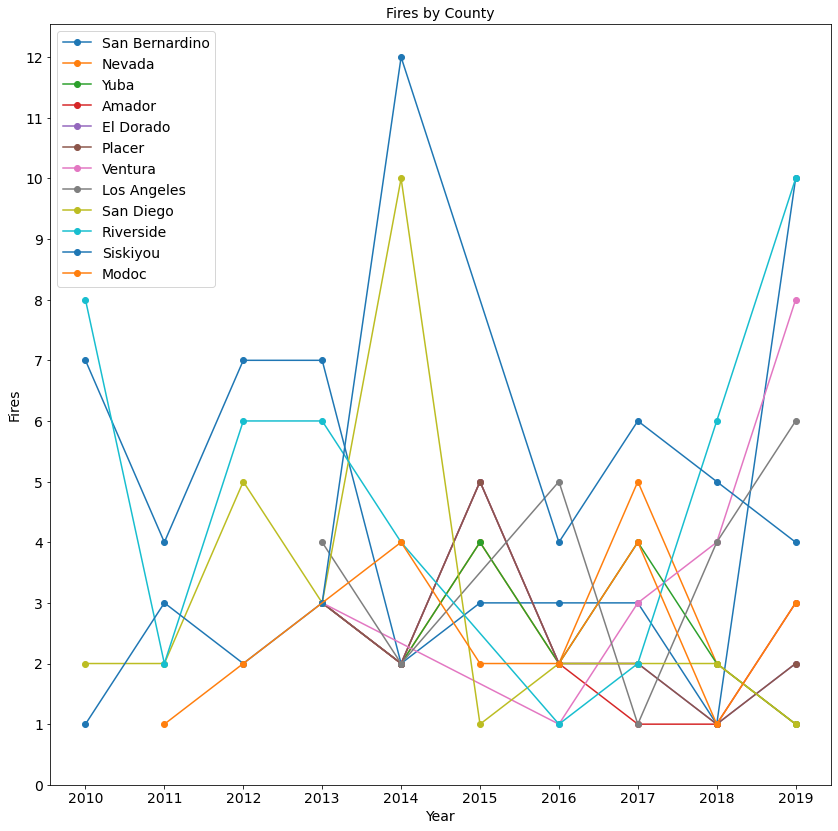

In [11]:
#OUTPUT SAVED - ADDING NEW CELLS ABOVE 
# Crazy looking line graph.
fig = plt.subplots(figsize=(14,14))
san_bernardino_plot, = plt.plot(san_bernardino["Year"],san_bernardino["Fires"],marker='o')
nevada_plot, = plt.plot(nevada["Year"],nevada["Fires"],marker='o')
yuba_plot, = plt.plot(yuba["Year"],yuba["Fires"],marker='o')
amador_plot, = plt.plot(amador["Year"],amador["Fires"],marker='o')
el_dorado_plot, = plt.plot(el_dorado["Year"],el_dorado["Fires"],marker='o')
placer_plot, = plt.plot(placer["Year"],placer["Fires"],marker='o')
ventura_plot, = plt.plot(ventura["Year"],ventura["Fires"],marker='o')
los_angeles_plot, = plt.plot(los_angeles["Year"],los_angeles["Fires"],marker='o')
san_diego_plot, = plt.plot(san_diego["Year"],san_diego["Fires"],marker='o')
riverside_plot, = plt.plot(riverside["Year"],riverside["Fires"],marker='o')
siskiyou_plot, = plt.plot(siskiyou["Year"],siskiyou["Fires"],marker='o')
modoc_plot, = plt.plot(modoc["Year"],modoc["Fires"],marker='o')
plt.legend((san_bernardino_plot,nevada_plot,yuba_plot,amador_plot,el_dorado_plot,placer_plot,ventura_plot,
           los_angeles_plot,san_diego_plot,riverside_plot,siskiyou_plot,modoc_plot),('San Bernardino',
            'Nevada','Yuba','Amador','El Dorado','Placer','Ventura','Los Angeles','San Diego',
            'Riverside','Siskiyou','Modoc'),fontsize=14)
plt.xlabel("Year",fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Fires",fontsize=14)
plt.yticks(([0,1,2,3,4,5,6,7,8,9,10,11,12]),fontsize=14)
plt.title("Fires by County",fontsize=14)
plt.savefig("pop_vs_fires_pngs/top_twelve_line_graph.png")

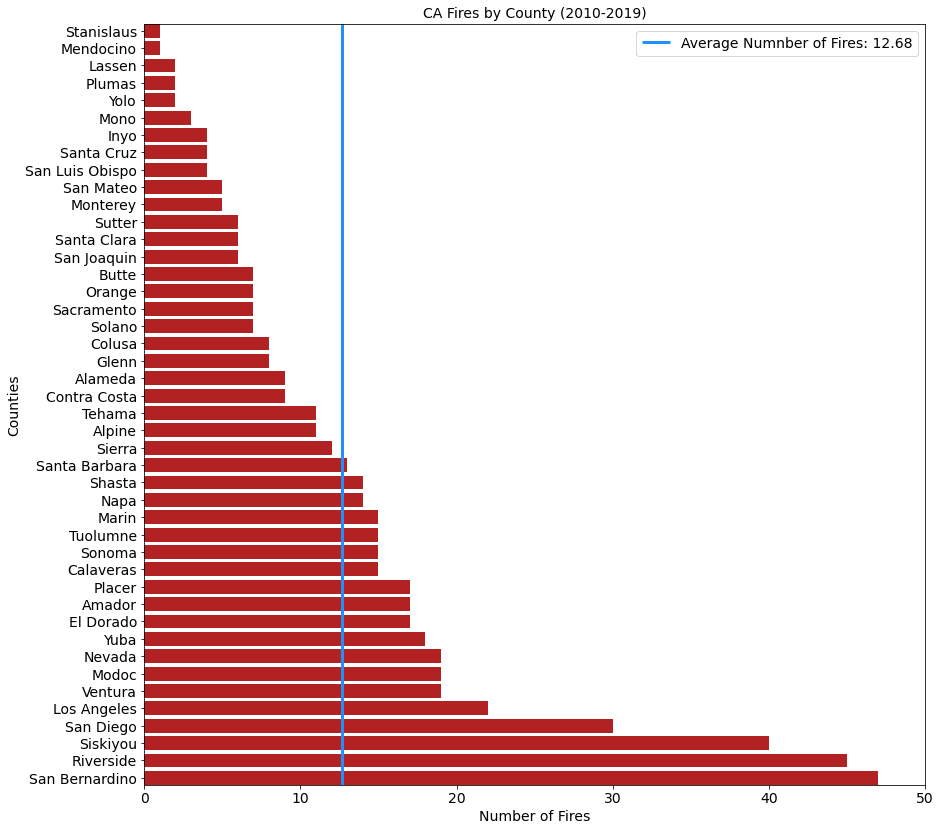

In [12]:
#OUTPUT SAVED - ADDING NEW CELLS ABOVE 
x = combo_counts["County"]
y = combo_counts["Fires"]
fig = plt.subplots(figsize=(14,14))
plt.xlim(0,50)
plt.xticks([0,10,20,30,40,50],fontsize=14)
plt.yticks(fontsize=14)
plt.autoscale(enable=True,axis='y',tight=True)
avg_line = plt.vlines(12.68,min(y)-10,max(y)+10,color='dodgerblue',linewidth=3)
plt.barh(x,y,align='center',color='firebrick')
plt.title("CA Fires by County (2010-2019)",fontsize=14)
plt.xlabel("Number of Fires",fontsize=14)
plt.ylabel("Counties",fontsize=14)
plt.legend((avg_line,),('Average Numnber of Fires: 12.68',''),fontsize=14)
plt.savefig("pop_vs_fires_pngs/County_Fire_Counts_All_Years.png")